In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
import numpy as np
import random

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train = np.expand_dims(x_train, axis = -1)
x_test = np.expand_dims(x_test, axis = -1)

In [4]:
x_train = np.repeat(x_train, 3, axis = -1)
x_test = np.repeat(x_test, 3, axis = -1)

In [5]:
x_train = tf.image.resize(x_train, (32, 32))
x_test = tf.image.resize(x_test, (32, 32))

In [6]:
x_train = x_train / 255.0
x_test =x_test / 255.0

In [7]:
#a
base_model = tf.keras.applications.MobileNetV2(
    weights = "imagenet",
    include_top = False,
    input_shape = (32, 32, 3)
)

C:\Users\Yash\AppData\Local\Temp\ipykernel_13880\3982004679.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


In [8]:
#b
base_model.trainable = False

In [9]:
#c
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [10]:
#d
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['Accuracy'])

In [11]:
model.fit(x_train, y_train, epochs = 3, batch_size = 64, validation_split = 0.1)

Epoch 1/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 85s 91ms/step - Accuracy: 0.6142 - loss: 1.1720 - val_Accuracy: 0.6870 - val_loss: 0.9199
Epoch 2/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 74s 88ms/step - Accuracy: 0.6816 - loss: 0.9362 - val_Accuracy: 0.7058 - val_loss: 0.8684
Epoch 3/3
844/844 ━━━━━━━━━━━━━━━━━━━━ 74s 88ms/step - Accuracy: 0.6951 - loss: 0.8914 - val_Accuracy: 0.7180 - val_loss: 0.8333


313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 68ms/step


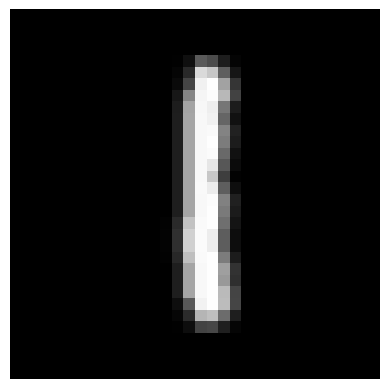

Prediction of image:  1


In [12]:
import matplotlib.pyplot as plt
p = model.predict(x_test)
r = random.randint(0, 9999)

plt.imshow(x_test[r])
plt.axis('off')
plt.show()

print("Prediction of image: ", np.argmax(p[r]))